<img style="float: right; margin: 0px 0px 15px 15px;" src="https://educationusa.state.gov/sites/default/files/wysiwyg/iteso_logo.jpg" width="520px" height="230px" />

# <span style="color: darkblue; ">TECHNICAL ANALYSIS PROJECT</span>
`MICROSTRUCTURE AND TRADING SYSTEMS`

- Juan Ramón Rocha Exp:###

Repository on GitHub: Link del repositorio

### Introduction
<div style="text-align: justify;">
Technical analysis is a trading discipline used to forecast the direction of prices by studying past market data, primarily price and volume. Operating on the premise that history tends to repeat itself, this approach focuses on identifying chart patterns and statistical trends to predict future market behavior. Instead of digging into a company's financial health, technical analysts use charts as their primary tool to pinpoint optimal moments to buy or sell, aiming to maximize returns and manage risk. This method, which originated with Charles Dow in the late 19th century, has become a cornerstone of modern trading strategies and provides the framework for the Python-based implementation developed in this project.
</div>

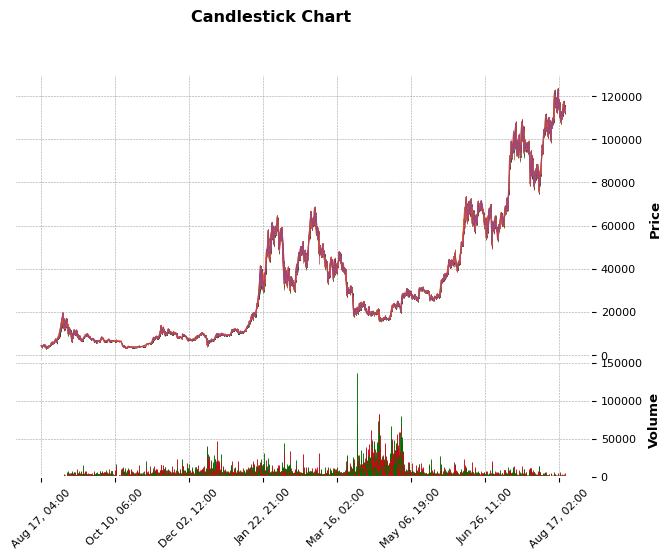

In [18]:
import pandas as pd
import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

data = pd.read_csv("files/Binance_BTCUSDT_1h.csv", header=1)
data.rename(columns={'Volume BTC':'Volume'}, inplace=True)

data.index = pd.to_datetime(data['Date'], format="ISO8601")
data.sort_index(inplace=True)

mpf_style = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})

mpf.plot(data, type='candle', style=mpf_style, volume=True, title='Candlestick Chart', mav=(3,6,9))

At a high level, this chart shows that BTCUSDT symbol have had an upward trend with an increase in price over the displayed time. Additionally, the transaction volume has varied, with some peaks that could correlate with significant price's drop.

### Technical Indicators
This project utilizes three key technical indicators to analyze market trends and generate trading signals. Each indicator offers a unique perspective on price action, from trend smoothing to measuring volatility and momentum.

#### Simple Moving Average (SMA)
The Simple Moving Average (SMA) is a fundamental indicator that smooths out price data to create a single flowing line, making it easier to identify the underlying trend. Think of it as looking at the average price over a specific period, which helps filter out the "noise" of short-term price fluctuations.

A common trading strategy involves watching for crossovers, where the asset's price crosses above or below the SMA line, often signaling a potential shift in momentum.

In the implemented code, this indicator uses the following parameters:

* `period`: The number of recent data points (e.g., 20 days) used to calculate the average. A shorter period reacts more quickly to price changes, while a longer period provides a smoother, less sensitive line.

* `file_path`: The path to the CSV file containing the historical price data needed for the calculation.

#### Bollinger Bands
Bollinger Bands are a powerful volatility indicator. They consist of three lines: a Simple Moving Average in the middle, an upper band, and a lower band. The upper and lower bands are typically placed two standard deviations away from the middle band.

The key feature is that the bands widen when market volatility increases and narrow when volatility decreases. This provides a dynamic range of expected price movement. Traders often use them to:

* Identify overbought conditions when the price touches the upper band.

* Identify oversold conditions when the price touches the lower band.

* Spot potential price breakouts when the bands tighten significantly (a "squeeze").

Parameters used in the code:

* `window`: The period used for calculating the middle band's SMA (e.g., 20 periods).

* `window_dev`: The number of standard deviations to set the upper and lower bands from the middle band. A value of 2 is standard.

* `fillna`: A boolean to determine if empty values generated during the initial calculation period should be filled.

#### Relative Strength Index (RSI)
The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between 0 and 100 and is primarily used to identify overbought or oversold conditions in a market.

* Overbought: An RSI reading above 70 suggests that an asset may be overvalued and is a candidate for a price pullback or reversal.

* Oversold: An RSI reading below 30 suggests that an asset may be undervalued and is a candidate for a price rally.

### Optimal strategy results

**1 day**

The strategy utilizes two technical analysis indicators: the Relative Strength Index (RSI) and the Money Flow Index (MFI). Specific hyperparameters chosen to maximize the strategy's effectiveness:

- **Number of shares (n_shares):** The strategy will operate with 4 shares at a time.

- **RSI window (rsi_window):** Set at 18 periods for calculating the RSI.

- **RSI buy threshold (rsi_buy):** A buy signal is issued when RSI exceeds 62.

- **RSI sell threshold (rsi_sell):** A sell signal is issued when RSI falls below 28.

- **MFI window (mfi_window):** Configured at 20 periods for calculating the MFI.

- **MFI buy threshold (mfi_buy):** A buy signal is generated when MFI exceeds 64.

- **MFI sell threshold (mfi_sell):** A sell signal is generated when MFI is below 25.

- **Strategy (strategy):** Both indicators, RSI and MFI, are used for trading decisions.

These hyperparameters are the values that have proven to be the most effective for this trading strategy in testing and optimizations.


**1 hour**
 
The strategy is optimized for a one-hour trading period and utilizes a single technical analysis indicator: the Moving Average (MA). Specific hyperparameters have been chosen to maximize the strategy's effectiveness within this timeframe:
 
- **Number of shares (n_shares):** The strategy will operate with 6 shares at a time.
 
- **MA window (ma_window):** Set at 12 periods for calculating the MA.
 
- **Strategy (strategy):** Only the Moving Average (MA) indicator is used for trading decisions.


**1 minute**
 
The strategy  is optimized for a one-minute trading period and utilizes the Moving Average (MA) technical analysis indicator. Specific hyperparameters have been chosen to maximize the strategy's responsiveness within this short timeframe:
 
- **Number of shares (n_shares):** The strategy will operate with 5 shares at a time.
 
- **MA window (ma_window):** Set at 12 periods for calculating the MA.
 
- **Strategy (strategy):** Only the Moving Average (MA) indicator is used for trading decisions.


**5 minutes**
 
The strategy for a five-minute trading window and utilizes the Relative Strength Index (RSI) as its core technical analysis indicator. To  optimal performance, the following hyperparameters selected:
 
- **Number of shares (n_shares):** The strategy is deployed with 6 shares concurrently.
 
- **RSI window (rsi_window):** Configured to a 28-period timeframe for the computation of the RSI.
 
- **RSI buy threshold (rsi_buy):** A buy signal is triggered when the RSI surpasses the 66 mark.
 
- **RSI sell threshold (rsi_sell):** Conversely, a sell signal is activated when the RSI dips below 36.
 
- **Strategy:** The strategy relies on the RSI.

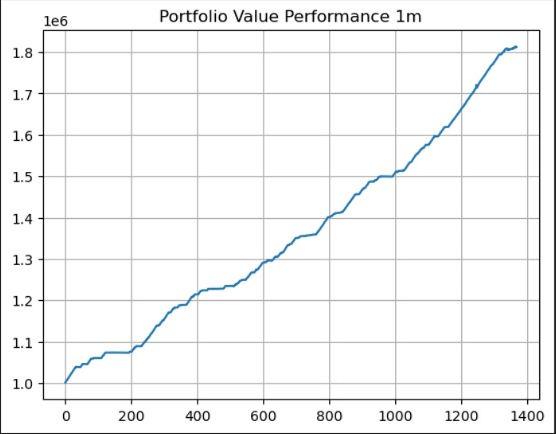

Beginning with 1,000,000, and using a strategy that combined RSI and MFI indicators each minute, the portfolio grew to $1,812,115.07 by the end of the year. This includes the cost of a small trading fee of 0.25% for each trade. In simpler terms, the strategy led to an 81.21% profit over the year, showing that this approach to day trading can be very effective.